<a href="https://colab.research.google.com/github/bu11ymaguire/studying/blob/main/Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#임의의 승률에 대해 이길 수 있는 슬롯머신 10대 구현

In [1]:
import numpy as np

class Bandit:
  def __init__(self, arms = 10):
    self.rates = np.random.rand(arms)

  def play(self, arm):
    rate = self.rates[arm]

    if rate > np.random.rand():
      return 1
    else:
      return 0

In [ ]:
bandit = Bandit()

In [ ]:
for i in range(10):
  print(bandit.play(0))

0
1
1
1
0
1
0
0
1
0


#에이전트 구현

## 증분 구현

In [ ]:
bandit = Bandit()
Q = 0

for n in range(1,11):
  reward = bandit.play(0)
  Q += (reward - Q) / n
  print(Q)

0.0
0.0
0.0
0.0
0.2
0.16666666666666669
0.14285714285714288
0.12500000000000003
0.11111111111111113
0.10000000000000002


## 슬롯머신 가치 추정기 갱신

In [ ]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(0,10)
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.33333333 0.         1.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.25 0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
[0.25 0.   1.   0.   0.   0.   1.   0.   0.   0.  ]
[0.25 0.   1.   0.   0.   0.   1.   0.   0.   0.  ]


#Agent 구현

In [2]:
class Agent:
  def __init__(self, epsilon, action_size = 10):
    self.epsilon = epsilon  # 탐색확률
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward): # 가치추정
    self.ns[action] +=1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

  def get_action(self): #행동 선택
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

## 에이전트는 epsilon이라는 확률에 따라서 탐색을 진행하거나 아니면, 가치 추정치가 가장 큰 행동을 선택한다.

In [3]:
import matplotlib.pyplot as plt

In [10]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] #보상합
rates = [] # 승률

In [11]:
for step in range(steps):
  action = agent.get_action()
  current_step_reward = bandit.play(action)
  agent.update(action, current_step_reward)
  total_reward += current_step_reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step + 1))

In [12]:
print(total_reward)

883


###에이전트와 환경이 상호작용하면서 에이전트는 보상을 획득해나간다.

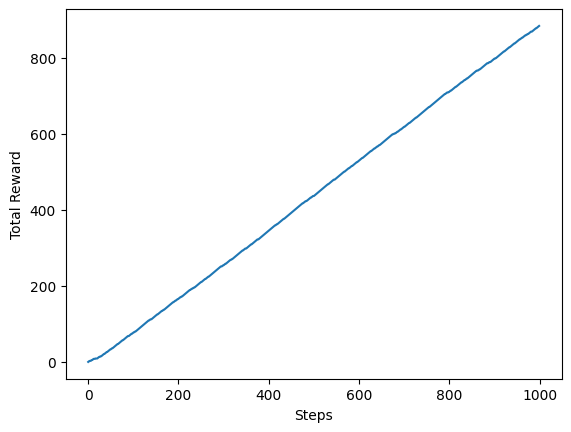

In [13]:
plt.ylabel('Total Reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

###에이전트는 초반에 요동치다가 200 epoch을 넘어가면서 승률이 0.8을 넘어간다.

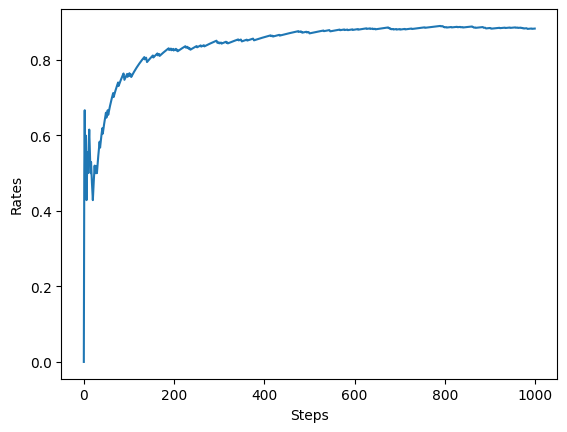

In [15]:
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

In [16]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (step + 1))

  all_rates[run, :] = rates

avg_rates = np.average(all_rates, axis = 0)

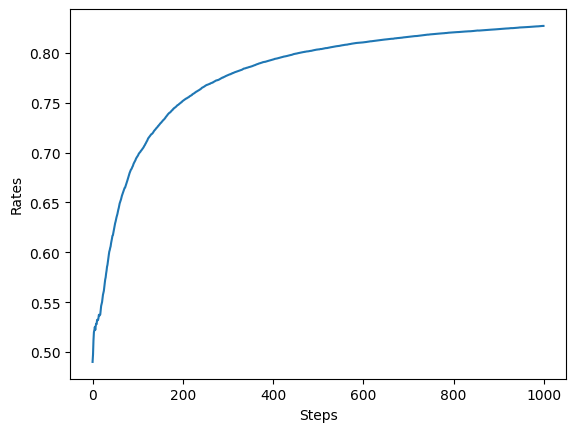

In [17]:
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

#정상 vs 비정상
- 정상: 한번 Setting 하면 그 값이 변하지 않음.
- 비정상: 값이 계속해서 변함

In [19]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions = 10):
    self.epsilon = epsilon
    self.Qs = np.zeros(actions)
    self.alpha = alpha

  def update(self, action, reward):
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return  np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

In [23]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

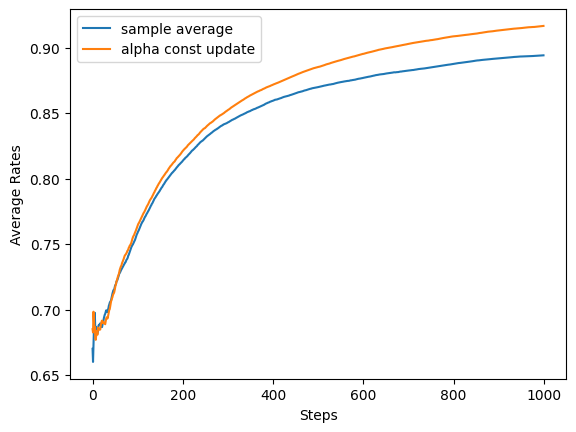

In [25]:
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()